In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Javier Lima, David Lezcano Becerra, Alfredo Nuño Oquendo, Alvaro Gónzales Brito, Albaro Suarez.

In [33]:
coord_range = (0, 20, 1)
len_range = coord_range[1] - coord_range[0]
a = 2.15
b = 5
c = 2
d = 4.6
e = 6.5
ff = 9
g = 2
hh = 5.1
i = 5

# (ab-d)/c, (gh-i+s)/2g, (ab-d)/a

p1 = [0, (a * b - d) / c, 0]
p2 = [0, ff, 0]
p3 = [(g * hh - i + np.sqrt(4 * e * ff * g + (g * hh - i) ** 2)) / (2 * g), 0, 0]
p4 = [(a * b - d) / a, 0, 0]

border_points = [[9,4]]

def ode_system(_y):
    value1 = _y[0] * (a * b * (1 - _y[0] / b) - c * _y[1] - d)
    value2 = _y[1] * (e * (ff - _y[1]) + g * _y[0] * (hh - _y[0]) - i * _y[0])
    if np.isfinite(value1) and np.isfinite(value1):
        return np.array([value1, value2])
    return _y

def ode_system_x(_y):
    return _y[0] * (a * b * (1 - _y[0] / b) - c * _y[1] - d)


def ode_system_z(_y):
    return _y[1] * (e * (ff - _y[1]) + g * _y[0] * (hh - _y[0]) - i * _y[0])


def x_nullcline_function(x):
    return (a * b - a * x - d) / c  # returns the z_value.

def z_nullcline_function(x):
    return (e*ff + g*hh*x - g*(x*x) - i*x)/e

def rk4(func, tk, _yk, _dt=0.1, **kwargs):
    """
    single-step fourth-order numerical integration (RK4) method
    func: system of first order ODEs
    tk: current time step
    _yk: current state vector [y1, y2, y3, ...]
    _dt: discrete time step size
    **kwargs: additional parameters for ODE system
    returns: y evaluated at time k+1
    """
    
    # evaluate derivative at several stages within time interval
    f1 = func(_yk, **kwargs)
    f2 = func(_yk + (f1 * (_dt / 2)), **kwargs)
    f3 = func(_yk + (f2 * (_dt / 2)), **kwargs)
    f4 = func(_yk + (f3 * _dt), **kwargs)
    # return an average of the derivative over tk, tk + dt
    
    if ( np.isfinite(f1[0]) and np.isfinite(f1[1]) and np.isfinite(f2[0]) and np.isfinite(f2[1]) and np.isfinite(f3[0]) and np.isfinite(f3[1]) and np.isfinite(f4[0]) and np.isfinite(f4[1]) ):
        return _yk + (_dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)
    else:
        return _yk

def get_trajectory(y0 = np.array([0,0]), number_steps = 100  ):
    state_history = []
    yk = y0
    t = 0
    for t in range(0, number_steps):
        state_history.append(yk)
        yk = rk4(ode_system, t, yk, 0.01) 

    state_history = np.array(state_history)
    state_history = [ (p[0], p[1], 0) for p in state_history if np.isfinite(p[0]) and np.isfinite(p[1])]
    return state_history
    
values = get_trajectory(np.array([9, 4]))

<ipython-input-33-1d9ce3829a08>:24: RuntimeWarning: overflow encountered in double_scalars
  value2 = _y[1] * (e * (ff - _y[1]) + g * _y[0] * (hh - _y[0]) - i * _y[0])
<ipython-input-33-1d9ce3829a08>:24: RuntimeWarning: invalid value encountered in double_scalars
  value2 = _y[1] * (e * (ff - _y[1]) + g * _y[0] * (hh - _y[0]) - i * _y[0])


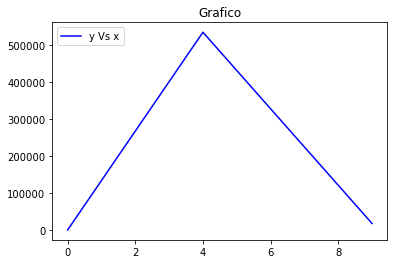

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(values[0], values[1], '-b', label='y Vs x')
ax.set_title('Grafico')
ax.set_label('X')
ax.set_label('Eje Y')
ax.legend(loc=2) 